## Configuration de l'environnement pour le projet MNIST

Création d'un environnement virtuel `DeepLearningE4` et installation des dépendances via un fichier `requirements.txt`. Résolution des problèmes de certificat SSL avec `certifi` pour le téléchargement des données MNIST.


In [4]:
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())


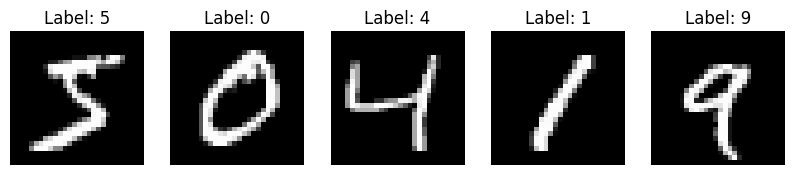

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# On commence par importer la base de données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pour s'assurer que ça a été correctement importé, on affiche les premiers éléments
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()


On affiche les premiers élèments de la liste ainsi que d'autres paramètres pour s'assurer que le jeu de données a été correctement importé et comment il est composé.

In [9]:
# nb d'images et d'étiquettes dans chaque ensemble (train et test)
print(f'Nombre d\'images d\'entraînement: {train_images.shape[0]}')
print(f'Nombre d\'images de test: {test_images.shape[0]}')

# dimensions des images
print(f'Dimensions des images: {train_images.shape[1]}x{train_images.shape[2]} pixels')

# types de données
print(f'Type de données des images: {train_images.dtype}')
print(f'Type de données des étiquettes: {train_labels.dtype}')

# distribution des étiquettes (tjr pour train et test)
unique, counts = np.unique(train_labels, return_counts=True)
print(f'Distribution des étiquettes d\'entraînement: {dict(zip(unique, counts))}')
unique, counts = np.unique(test_labels, return_counts=True)
print(f'Distribution des étiquettes de test: {dict(zip(unique, counts))}')

Nombre d'images d'entraînement: 60000
Nombre d'images de test: 10000
Dimensions des images: 28x28 pixels
Type de données des images: uint8
Type de données des étiquettes: uint8
Distribution des étiquettes d'entraînement: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Distribution des étiquettes de test: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Nous avons choisi d'utiliser l'accuracy comme métrique car aucune classe n'est sur representée dans le jeu de données, elles sont toutes équilibrées.

## Préparation des données
La normalisation des données sera identique pour tous les modèles. Pour les architectures nécessitant des données sous forme de vecteurs (comme les perceptrons multicouches), nous avons également aplati les images. Cependant, certaines architectures, comme les réseaux de neurones convolutionnels (CNN), nécessitent que les images restent sous forme matricielle et peuvent nécessiter d'autres formes de préparation spécifique. Nous adapterons la préparation des données en fonction du type de modèle lorsque nous arriverons à ces étapes du projet. Pour l'instant, nous avons normalisé et aplati les données.
Nous avons également besoin qu eles étiquettes soient sous une forme "one-hot encoded" puisque nous envisageons d'utiliser la fonction de perte 'categorical_crossentropy' qui attend les étiquettes dans ce format.


In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisation des données 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Affichage des valeurs minimales et maximales pour confirmer la normalisation (doit être entre 0 et 1)
print(f'Valeur minimale dans les images d\'entraînement: {train_images.min()}')
print(f'Valeur maximale dans les images d\'entraînement: {train_images.max()}')
print(f'Valeur minimale dans les images de test: {test_images.min()}')
print(f'Valeur maximale dans les images de test: {test_images.max()}')

Valeur minimale dans les images d'entraînement: 0.0
Valeur maximale dans les images d'entraînement: 1.0
Valeur minimale dans les images de test: 0.0
Valeur maximale dans les images de test: 1.0


In [37]:
# Redimensionnement des images 
train_images_flat = train_images.reshape((60000, 784))  # 784 = 28x28
test_images_flat = test_images.reshape((10000, 784))

print("Forme des images d'entraînement aplatis: ", train_images_flat.shape)
print("Forme des images de test aplatis: ", test_images_flat.shape)


Forme des images d'entraînement aplatis:  (60000, 784)
Forme des images de test aplatis:  (10000, 784)


In [43]:
from tensorflow.keras.utils import to_categorical

# Conversion des étiquettes en format one-hot
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

print("Forme des étiquettes d'entraînement one-hot: ", train_labels_categorical.shape)
print("Forme des étiquettes de test one-hot: ", test_labels_categorical.shape)


Forme des étiquettes d'entraînement one-hot:  (60000, 10)
Forme des étiquettes de test one-hot:  (10000, 10)


## Modèle à 1 couche

### Définir le modèle
La couche aura 10 unités de sortie car nous avons 10 classes possibles dans le jeu de données MNIST (les chiffres de 0 à 9).
Nous utiliserons la fonction softmax.

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Création du modèle
modele_1_couche = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))  # 784 correspond à 28x28 pixels aplatis
])

modele_1_couche.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### Compiler le modèle

In [58]:
modele_1_couche.compile(
    optimizer='adam',  
    loss='categorical_crossentropy',  
    metrics=['accuracy']  
)


### Entraîner le modèle

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7878 - loss: 0.8033 - val_accuracy: 0.9138 - val_loss: 0.3182
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9097 - loss: 0.3239 - val_accuracy: 0.9188 - val_loss: 0.2899
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9172 - loss: 0.2934 - val_accuracy: 0.9237 - val_loss: 0.2751
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9202 - loss: 0.2897 - val_accuracy: 0.9259 - val_loss: 0.2716
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9248 - loss: 0.2752 - val_accuracy: 0.9268 - val_loss: 0.2663
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9278 - loss: 0.2591 - val_accuracy: 0.9280 - val_loss: 0.2653
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9248 - loss: 0.2697 - val_accuracy: 0.9284 - val_loss: 0.2615
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9279 -

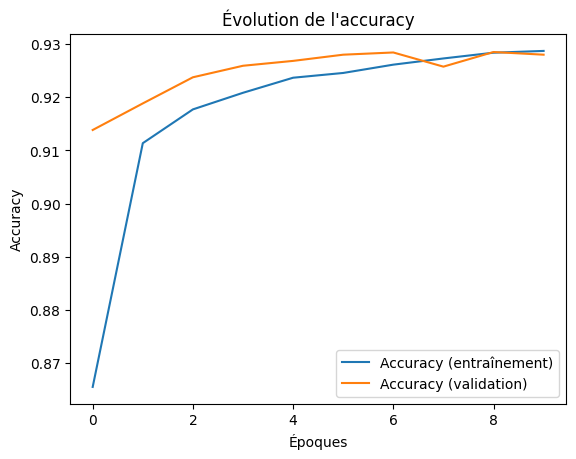

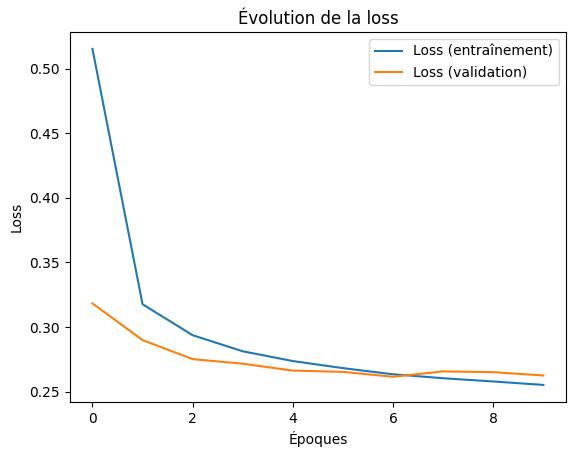

In [59]:
history = modele_1_couche.fit(
    train_images_flat,  
    train_labels_categorical,  
    epochs=10,  
    validation_split=0.2 
)

# Affichage de l'évolution de l'entraînement

plt.plot(history.history['accuracy'], label='Accuracy (entraînement)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (entraînement)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Évolution de la loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Test du modèle sur des données jamais vues

In [60]:
test_loss, test_accuracy = modele_1_couche.evaluate(test_images_flat, test_labels_categorical)

print(f'Loss sur l\'ensemble de test: {test_loss}')
print(f'Accuracy sur l\'ensemble de test: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9169 - loss: 0.3028
Loss sur l'ensemble de test: 0.2687511146068573
Accuracy sur l'ensemble de test: 0.9261000156402588


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


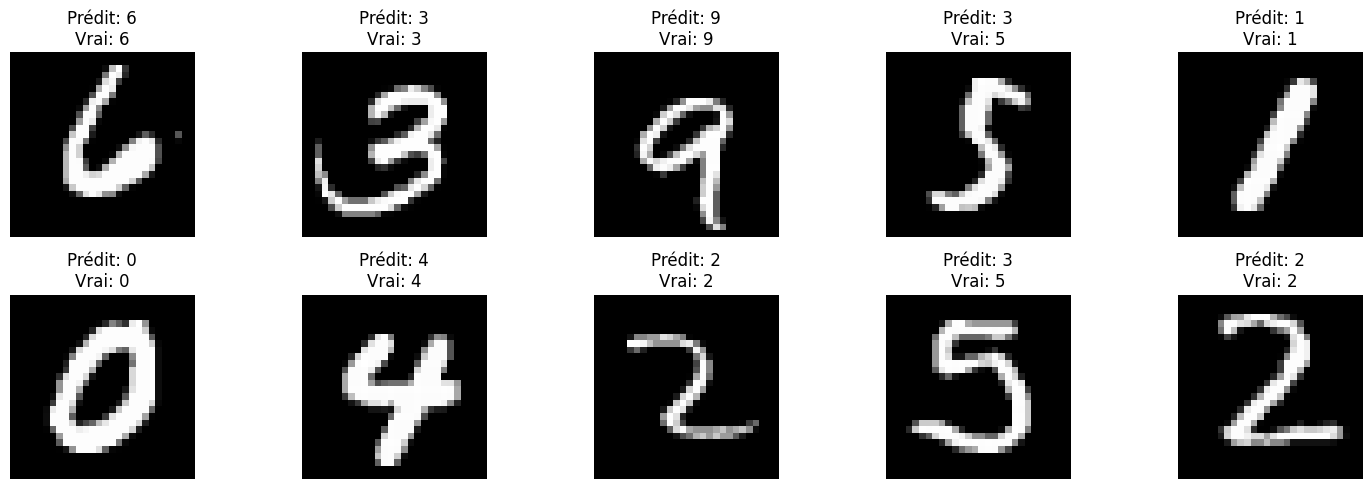

In [61]:
# On va choisir des images random pour voir le résultat de la prédiction
indices = np.random.choice(range(len(test_images)), 10)
images = test_images[indices]
labels = test_labels[indices]
flat_images = test_images_flat[indices]

predictions = modele_1_couche.predict(flat_images)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Prédit: {np.argmax(predictions[i])}\nVrai: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

On affiche certains résultats tirés aléatoirement pour avoir une illustration directe.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


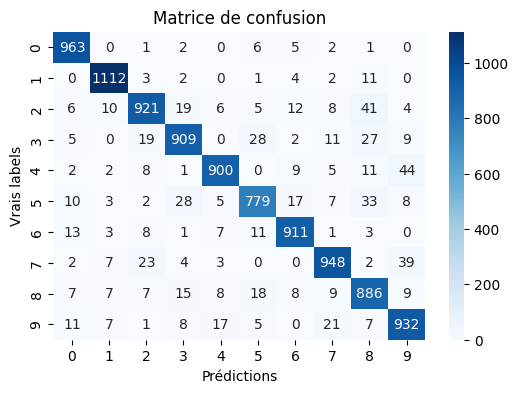

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_classes = np.argmax(modele_1_couche.predict(test_images_flat), axis=1)

cm = confusion_matrix(test_labels, pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vrais labels')
plt.xlabel('Prédictions')
plt.show()


La matrice de confusion ci-dessus permet d'évaluer la performance du modèle de classification sur l'ensemble de test. Chaque ligne représente les instances dans une classe réelle, tandis que chaque colonne représente les instances dans une classe prédite. Les valeurs sur la diagonale principale montrent le nombre de prédictions correctes pour chaque chiffre (vrais positifs). Les autres valeurs indiquent le nombre de fois où un chiffre a été incorrectement classé comme un autre chiffre.

- Le chiffre **1** est le mieux classé, avec un total de **1112** prédictions correctes.
- Le chiffre **5** montre plus de difficulté, avec **779** prédictions correctes et un nombre relativement élevé de confusions, particulièrement avec les chiffres **3** et **8**.
- Les chiffres **0**, **1**, **3**, **7**, et **9** ont également des taux de réussite élevés, avec très peu de confusions majeures.

Cette matrice révèle que, bien que le modèle performe globalement bien, il existe certaines confusions spécifiques entre les chiffres qui pourraient être améliorées. Par exemple, travailler sur la distinction entre les chiffres **5** et **3** pourrait être bénéfique pour augmenter l'efficacité globale du modèle.


In [64]:
# Calcul du nombre de fautes total (pour voir si on approche de l'objectif de 21 sur 10 000)
test_errors = np.sum(pred_classes != test_labels)
print(f"Nombre de fautes sur l'ensemble de test : {test_errors} sur {len(test_labels)} images")


Nombre de fautes sur l'ensemble de test : 739 sur 10000 images


In [66]:
# pour l'ensemble d'entraînement
train_pred_classes = np.argmax(modele_1_couche.predict(train_images_flat), axis=1)
train_errors = np.sum(train_pred_classes != train_labels)
print(f"Nombre de fautes sur l'ensemble d'entraînement : {train_errors} sur {len(train_labels)} images")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step
Nombre de fautes sur l'ensemble d'entraînement : 4188 sur 60000 images


Nous avons calculé le nombre de fautes commises par notre modèle sur les ensembles d'entraînement et de test. Voici les résultats obtenus :

- **Ensemble d'entraînement** : 4188 fautes sur 60000 images.
- **Ensemble de test** : 739 fautes sur 10000 images.

Ces résultats sont comparés à la meilleure performance historique sur le jeu de données MNIST, qui est de seulement 21 fautes sur 10000 images. Bien que notre modèle actuel soit relativement performant, il est clair qu'il y a une marge considérable pour l'amélioration.

Dans les prochaines étapes de notre projet, nous explorerons d'autres architectures de réseaux neuronaux, notamment des modèles avec plusieurs couches et des couches de convolution, dans l'espoir de nous rapprocher de cette meilleure performance historique.


# Modèle à plusieurs couches 
Dans cette section, nous aurons plusieurs sous sections.
Nous avons abordé dans un premier temps un modèle à une couche, maintenant nous allons aborder les modèles à plusieurs couches en avancant progressivement (2 couches puis 3 etc).
Par ailleurs, pour la compilation du modèle, nous garderons les mêmes paramètres que ceux du modèle à 1 couche pour pouvoir ainsi comparer leurs performances de manière cohérente.

## Modèle à 2 couches

In [71]:
# Définir le modèle à 2 couches
modele_2_couches = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  
    Dense(64, activation='relu'),  
    Dense(10, activation='softmax')  
], name="modele_2_couches")

modele_2_couches.summary()

Model: "modele_2_couches"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compilation du modèle à 2 couches
# Comme dit plus haut, on gardera les mêmes paramètres pour tous nos modèles
modele_2_couches.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.8565 - loss: 0.4842 - val_accuracy: 0.9593 - val_loss: 0.1331
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9648 - loss: 0.1182 - val_accuracy: 0.9631 - val_loss: 0.1295
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9771 - loss: 0.0761 - val_accuracy: 0.9637 - val_loss: 0.1175
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9804 - loss: 0.0615 - val_accuracy: 0.9720 - val_loss: 0.0968
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9868 - loss: 0.0441 - val_accuracy: 0.9730 - val_loss: 0.1002
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9717 - val_loss: 0.1048
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9718 - val_loss: 0.1067
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9916 -

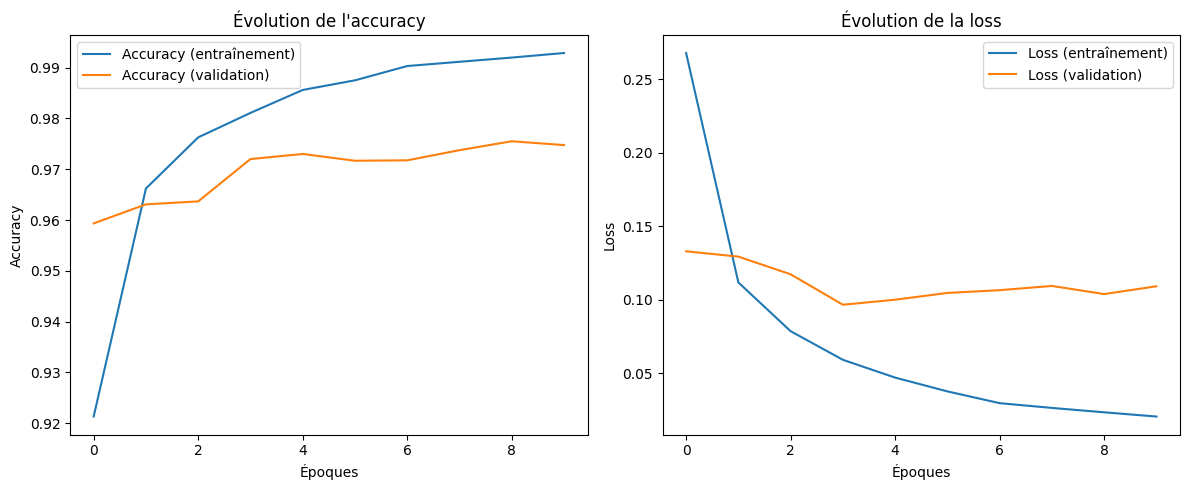

In [73]:
# Entraînement du modèle à deux couches
history_2_couches = modele_2_couches.fit(
    train_images_flat,  
    train_labels_categorical,  
    epochs=10, 
    validation_split=0.2,  
    batch_size=32  
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2_couches.history['accuracy'], label='Accuracy (entraînement)')
plt.plot(history_2_couches.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2_couches.history['loss'], label='Loss (entraînement)')
plt.plot(history_2_couches.history['val_loss'], label='Loss (validation)')
plt.title('Évolution de la loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
test_loss, test_accuracy = modele_2_couches.evaluate(test_images_flat, test_labels_categorical)

print(f'Loss sur l\'ensemble de test: {test_loss}')
print(f'Accuracy sur l\'ensemble de test: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9763 - loss: 0.1054
Loss sur l'ensemble de test: 0.0886983647942543
Accuracy sur l'ensemble de test: 0.9793999791145325


In [84]:
# On va voir si on approche des 21 erreurs sur 10 000 du meilleur modèle
predicted_classes = np.argmax(modele_2_couches.predict(test_images_flat), axis=1)
true_classes = np.argmax(test_labels_categorical, axis=1)

incorrect_predictions = np.sum(predicted_classes != true_classes)
print(f'Nombre de prévisions fausses sur l\'ensemble de test: {incorrect_predictions}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Nombre de prévisions fausses sur l'ensemble de test: 206


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


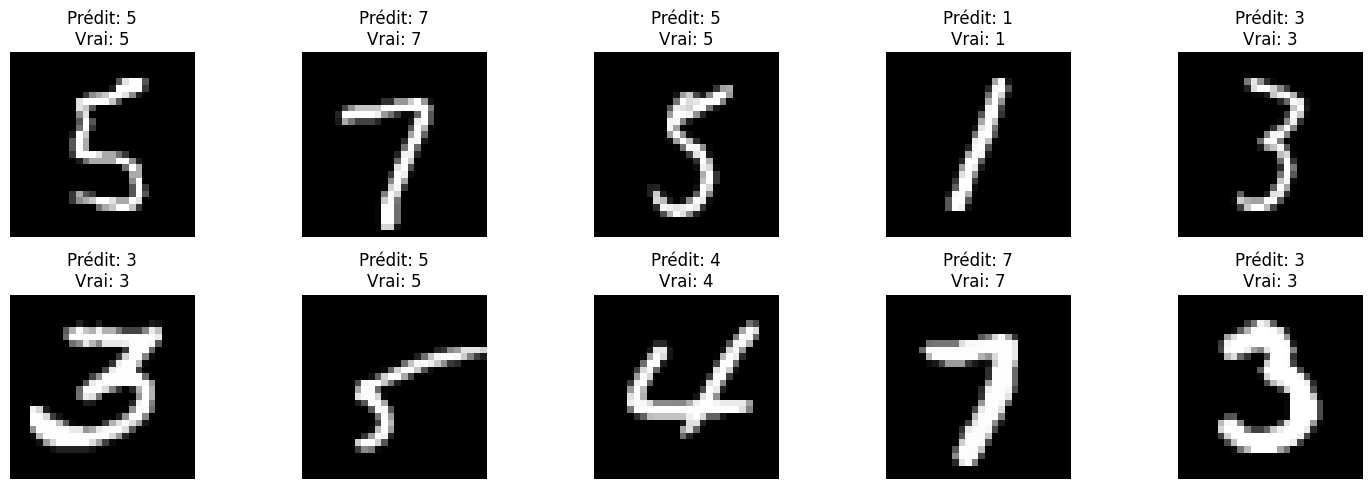

In [76]:
# On va choisir des images random pour voir le résultat de la prédiction
indices = np.random.choice(range(len(test_images)), 10)
images = test_images[indices]
labels = test_labels[indices]
flat_images = test_images_flat[indices]

predictions = modele_2_couches.predict(flat_images)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Prédit: {np.argmax(predictions[i])}\nVrai: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

On constate que cette fois les 10 élèments choisis ont tous été correctement prédits contrairement au modèle à une couche. Compte tenu des excellentes performances des modèles que nous développerons à partir de maintenant, nous avons choisi de ne plus afficher aléatoirement certains chiffres et comparer les prédictions du modèle avec la réalité.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


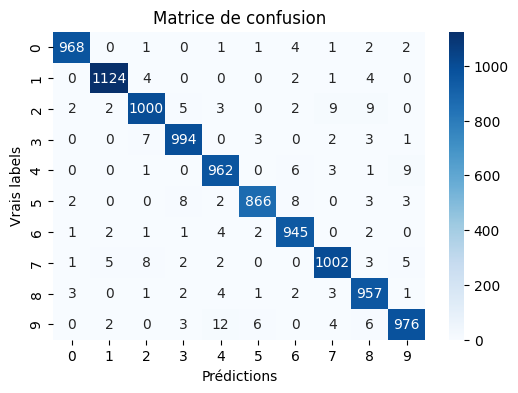

In [86]:
pred_classes = np.argmax(modele_2_couches.predict(test_images_flat), axis=1)

cm = confusion_matrix(test_labels, pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vrais labels')
plt.xlabel('Prédictions')
plt.show()


Tout comme pour le modèle à 1 couche, **le chiffre 1** est celui qui est le mieux classé avec **1124** prédictions correctes tandis que **le chiffre 5** est celui qui est le moins bon taux de prédictions, souvent confondu encore avec **le 3**.


## Performance du Modèle à Deux Couches

Le modèle à deux couches a été évalué sur l'ensemble de test pour mesurer sa capacité à généraliser sur de nouvelles données. Les résultats obtenus sont les suivants :

- **Accuracy** : 97.94%
- **Loss** : 0.0887

Ces résultats indiquent une excellente performance, avec une accuracy très élevée et une faible loss, signifiant que le modèle non seulement classe correctement les images la plupart du temps, mais le fait aussi avec une grande confiance. Ces performances sont significativement meilleures que celles du modèle à une seule couche, démontrant l'effet bénéfique d'une capacité de modèle accrue pour ce jeu de données. Toutefois, il convient de rester vigilant face au risque de surapprentissage, comme suggéré par la différence entre l'accuracy d'entraînement et de validation lors des phases d'entraînement. Des stratégies de régularisation pourraient être explorées pour améliorer encore la robustesse du modèle.


## Modèle à 3 couches

In [78]:
# Création du modèle à trois couches
modele_3_couches = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # 1ere
    Dense(64, activation='relu'),  # 2eme
    Dense(32, activation='relu'),  # 3eme
    Dense(10, activation='softmax')  # Couche de sortie
], name="modele_3_couches")

modele_3_couches.summary()

Model: "modele_3_couches"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Compilation du modèle à trois couches
modele_3_couches.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8450 - loss: 0.5169 - val_accuracy: 0.9595 - val_loss: 0.1343
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9620 - loss: 0.1242 - val_accuracy: 0.9662 - val_loss: 0.1154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9756 - loss: 0.0813 - val_accuracy: 0.9688 - val_loss: 0.1020
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9817 - loss: 0.0591 - val_accuracy: 0.9708 - val_loss: 0.1095
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9850 - loss: 0.0477 - val_accuracy: 0.9715 - val_loss: 0.1046
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9862 - loss: 0.0417 - val_accuracy: 0.9741 - val_loss: 0.1029
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9884 - loss: 0.0344 - val_accuracy: 0.9720 - val_loss: 0.1094
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9910 -

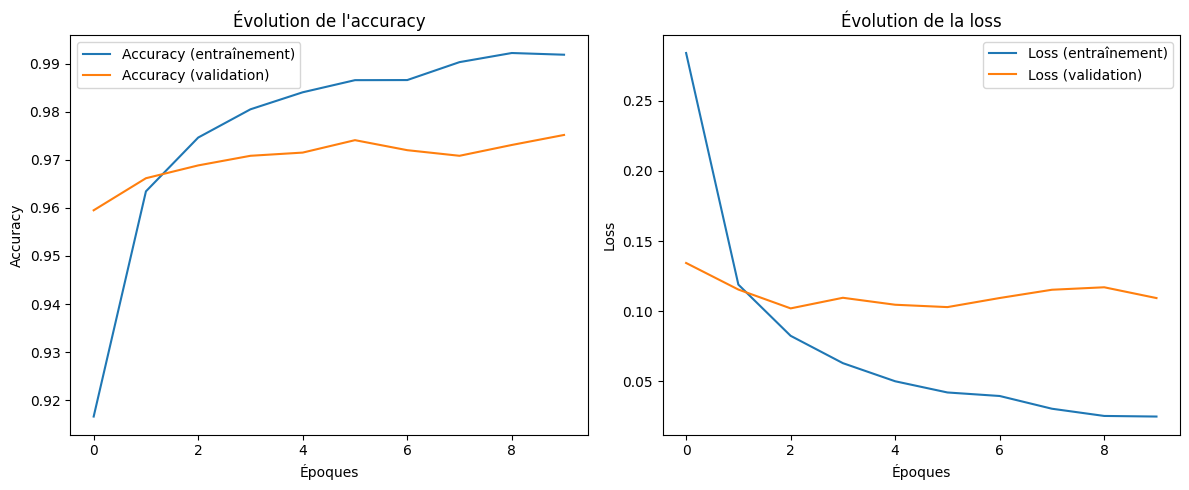

In [80]:
# Entraînement du modèle à trois couches
history_3_couches = modele_3_couches.fit(
    train_images_flat,  
    train_labels_categorical,  
    epochs=10, 
    validation_split=0.2,  
    batch_size=32  
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_3_couches.history['accuracy'], label='Accuracy (entraînement)')
plt.plot(history_3_couches.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Évolution de l\'accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_3_couches.history['loss'], label='Loss (entraînement)')
plt.plot(history_3_couches.history['val_loss'], label='Loss (validation)')
plt.title('Évolution de la loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [81]:
test_loss_3_couches, test_accuracy_3_couches = modele_3_couches.evaluate(test_images_flat, test_labels_categorical)

print(f'Loss sur l\'ensemble de test: {test_loss_3_couches}')
print(f'Accuracy sur l\'ensemble de test: {test_accuracy_3_couches}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9734 - loss: 0.1066
Loss sur l'ensemble de test: 0.09353778511285782
Accuracy sur l'ensemble de test: 0.9767000079154968


In [83]:
# On va voir si on approche des 21 erreurs sur 10 000 du meilleur modèle
predicted_classes = np.argmax(modele_3_couches.predict(test_images_flat), axis=1)
true_classes = np.argmax(test_labels_categorical, axis=1)

incorrect_predictions = np.sum(predicted_classes != true_classes)
print(f'Nombre de prévisions fausses sur l\'ensemble de test: {incorrect_predictions}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Nombre de prévisions fausses sur l'ensemble de test: 233


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


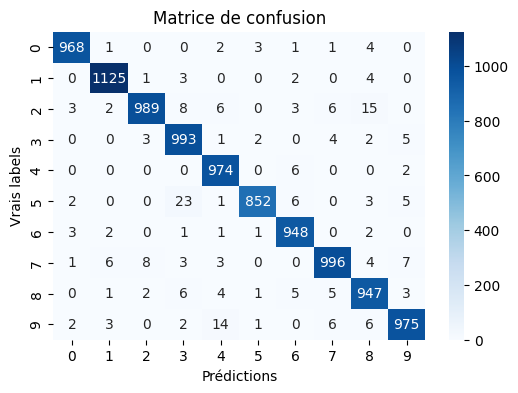

In [87]:
pred_classes = np.argmax(modele_3_couches.predict(test_images_flat), axis=1)

cm = confusion_matrix(test_labels, pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vrais labels')
plt.xlabel('Prédictions')
plt.show()


La matrice de confusion ci-dessus offre les mêmes analyses que pour les modèles à 1 et 2 couches.

## Comparaison des Modèles à Deux et Trois Couches

Après avoir développé et évalué des modèles de deep learning avec deux et trois couches sur le jeu de données MNIST, voici les conclusions clés :

### Performance des Modèles
- **Modèle à deux couches** :
  - Nombre de prévisions fausses sur l'ensemble de test : 206
  - Accuracy sur l'ensemble de test : Environ 97.94%
- **Modèle à trois couches** :
  - Nombre de prévisions fausses sur l'ensemble de test : 233
  - Accuracy sur l'ensemble de test : Environ 97.67%

Le modèle à deux couches montre une légère supériorité en termes de précision et de nombre d'erreurs par rapport au modèle à trois couches.

### Analyse des Résultats
La complexité accrue du modèle à trois couches ne s'est pas traduite par une meilleure performance, ce qui pourrait indiquer un surapprentissage. Malgré sa capacité à capturer des relations plus complexes dans les données d'entraînement, ce modèle a montré des signes de surajustement aux données, affectant négativement sa capacité à généraliser sur de nouvelles données.

### Optimisation et Surapprentissage
- Le modèle à deux couches semble avoir mieux équilibré la capacité d'apprentissage et la généralisation, probablement en raison de sa structure moins complexe.
- Pour le modèle à trois couches, des ajustements des hyperparamètres tels que le taux d'apprentissage, l'introduction de techniques de régularisation (e.g., Dropout), ou une modification de la taille des lots pourraient être nécessaires pour améliorer la performance et réduire le surapprentissage.

### Conclusion
Les résultats soulignent l'importance d'un équilibre entre la capacité du modèle et sa généralisation. Ajouter des couches à un réseau neuronal augmente sa complexité mais ne garantit pas nécessairement une meilleure performance sur des données non vues. Des ajustements fins et une attention particulière au surapprentissage sont cruciaux pour optimiser la performance des modèles de deep learning.


# CNN

On passe maintenant à la dernière méthode qui est censé nous apporter les meilleurs résultats possibles, les réseaux de neurones convolutifs aussi appelées CNN. 

In [89]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Création du modèle CNN
modele_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Couche de convolution
    MaxPooling2D(pool_size=(2, 2)),  # Couche de pooling
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Deuxième couche de convolution
    MaxPooling2D(pool_size=(2, 2)),  # Deuxième couche de pooling
    Flatten(),  # Aplatit les données pour la transition vers les couches denses
    Dense(128, activation='relu'),  # Couche dense
    Dense(10, activation='softmax')  # Couche de sortie
], name="modele_cnn")

modele_cnn.summary()

Model: "modele_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Compilation du modèle CNN
# toujours les mêmes parametres que pour les précédents modeles
modele_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [91]:
# Préparation des données d'entrée pour le CNN (ajout de la dimension canal)
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))

# Entraînement du modèle CNN
history_cnn = modele_cnn.fit(
    train_images_cnn, 
    train_labels_categorical,  
    epochs=10,  
    validation_split=0.2,  
    batch_size=32  
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.8978 - loss: 0.3326 - val_accuracy: 0.9803 - val_loss: 0.0632
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9844 - loss: 0.0498 - val_accuracy: 0.9836 - val_loss: 0.0513
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9892 - val_loss: 0.0356
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9883 - val_loss: 0.0416
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9951 - loss: 0.0159 - val_accuracy: 0.9893 - val_loss: 0.0398
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9908 - val_loss: 0.0374
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9973 - loss: 0.0079 - val_accuracy: 0.9894 - val_loss: 0.0413
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9976 -

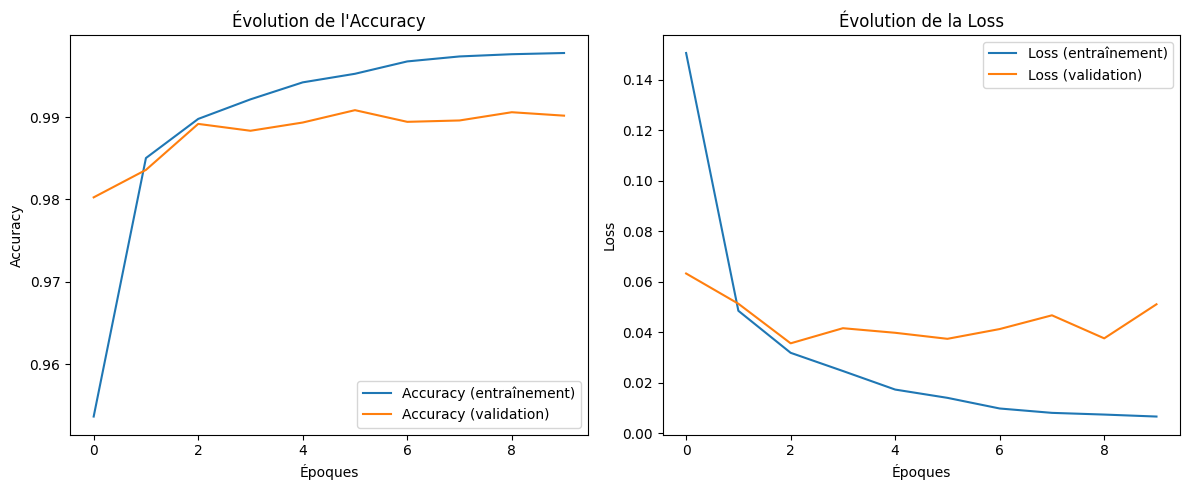

In [92]:
# Affichage de l'évolution de l'accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Accuracy (entraînement)')
plt.plot(history_cnn.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

# Affichage de l'évolution de la loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Loss (entraînement)')
plt.plot(history_cnn.history['val_loss'], label='Loss (validation)')
plt.title('Évolution de la Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [93]:
# Évaluer le modèle CNN sur l'ensemble de test
test_loss_cnn, test_accuracy_cnn = modele_cnn.evaluate(test_images_cnn, test_labels_categorical)

# Afficher les résultats
print(f'Loss sur l\'ensemble de test: {test_loss_cnn}')
print(f'Accuracy sur l\'ensemble de test: {test_accuracy_cnn}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9860 - loss: 0.0527
Loss sur l'ensemble de test: 0.041935961693525314
Accuracy sur l'ensemble de test: 0.989799976348877


In [95]:
predicted_classes_cnn = modele_cnn.predict(test_images_cnn)
predicted_classes_cnn = np.argmax(predicted_classes_cnn, axis=1)

true_classes_cnn = np.argmax(test_labels_categorical, axis=1)

# Calcul du nombre de prédictions incorrectes
incorrect_predictions_cnn = np.sum(predicted_classes_cnn != true_classes_cnn)
print(f'Nombre de prévisions fausses sur l\'ensemble de test: {incorrect_predictions_cnn}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Nombre de prévisions fausses sur l'ensemble de test: 102


Malheureusement on est encore loin du record de 21 fautes même si on s'en sort bien avec 102.

  1/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


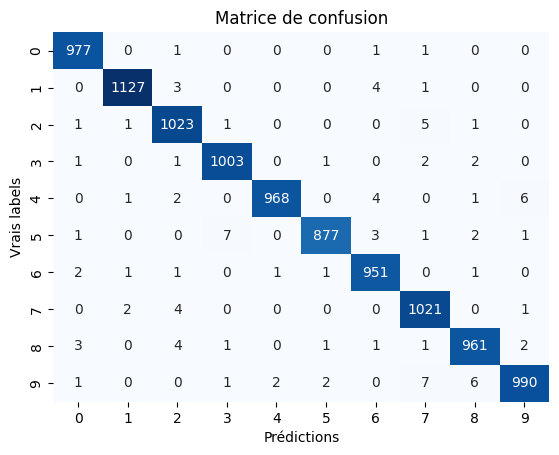

In [98]:
import seaborn as sns

# Prédictions sur l'ensemble de test
predicted_classes_cnn = modele_cnn.predict(test_images_cnn)
predicted_classes_cnn = np.argmax(predicted_classes_cnn, axis=1)

# Vraies classes des images de test
true_classes_cnn = np.argmax(test_labels_categorical, axis=1)

# Calcul de la matrice de confusion
cm = confusion_matrix(true_classes_cnn, predicted_classes_cnn)

# Affichage de la matrice de confusion
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Matrice de confusion')
plt.ylabel('Vrais labels')
plt.xlabel('Prédictions')
plt.show()

Même conclusion que pour les matrices de confusion précédentes, le chiffre 1 est celui qui s'en sort le mieux tandis que le 5 est toujours problématique.